In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.io
import matplotlib.pyplot as plt
import os
import anndata
import harmonypy as hm
import seaborn as sns
import scrublet as scr
import bbknn as bk
%matplotlib inline
import glob
from statannotations.Annotator import Annotator

/rds/general/user/snb20/home/anaconda3/envs/scanpy1.8.2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#from statannot import add_stat_annotation

In [3]:
from statannotations.Annotator import Annotator

In [4]:
sc.settings.set_figure_params(dpi=300,fontsize=10)

In [5]:
df = pd.read_csv("/rds/general/user/snb20/home/2_Organotypic_EC_Heterogeneity/Sanger_Datasets/Resolve/SMC_quantification/smc_merged_final_art_ven_small_large.csv", index_col = 0)

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
df

,RERGL_percent,STEAP4_percent,FGF7_percent,KCNJ8_percent,AGT_percent,STEAP4_FGF7_percent,STEAP4_KCNJ8_percent,RERGL,RERGL_log2_mean,STEAP4,...,KCNJ8,SEMA3G,ACKR1,RGCC,SMOC1,Vessel,size,group,vessel_size,ROI
ROI_A1-1_0,0.000000,0.083333,0.083333,0.250000,0.333333,0.000000,0.000000,NaN,NaN,1.000000,...,2.000000,NaN,NaN,NaN,1.000000,Subendocardium,12,Small,Subendocardium_Small,A1-1
ROI_A1-1_1,0.000000,0.125000,0.062500,0.187500,0.062500,0.000000,0.000000,NaN,NaN,1.000000,...,1.333333,NaN,NaN,NaN,6.000000,Subendocardium,16,Small,Subendocardium_Small,A1-1
ROI_A1-1_10,0.333333,0.111111,0.000000,0.111111,0.666667,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.200000,NaN,1.000000,NaN,Artery,9,Small,Artery_Small,A1-1
ROI_A1-1_15,0.333333,0.166667,0.000000,0.166667,0.500000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,2.000000,NaN,NaN,NaN,Artery,6,Small,Artery_Small,A1-1
ROI_A1-1_2,0.000000,0.375000,0.000000,0.000000,0.375000,0.000000,0.000000,NaN,NaN,1.000000,...,NaN,NaN,1.833333,NaN,NaN,Vein,8,Small (Large),Vein_Large,A1-1
ROI_A1-1_22,0.400000,0.000000,0.000000,0.100000,0.400000,0.000000,0.000000,2.250000,1.169925,NaN,...,1.000000,2.333333,NaN,1.500000,NaN,Artery,10,Small,Artery_Small,A1-1
ROI_A1-1_7,0.763158,0.157895,0.026316,0.447368,0.815789,0.026316,0.026316,2.827586,1.499571,2.666667,...,1.294118,2.352941,NaN,1.000000,NaN,Artery,38,Large,Artery_Large,A1-1
ROI_A1-1_9,0.333333,0.416667,0.000000,0.250000,0.916667,0.000000,0.083333,2.250000,1.169925,2.000000,...,1.000000,1.833333,NaN,1.000000,NaN,Artery,12,Small,Artery_Small,A1-1
ROI_A1-2_0,0.857143,0.142857,0.000000,0.142857,1.000000,0.000000,0.000000,3.166667,1.662965,1.000000,...,1.000000,1.000000,NaN,1.000000,NaN,Artery,7,Small,Artery_Small,A1-2
ROI_A1-2_2,0.111111,0.000000,0.111111,0.000000,0.444444,0.000000,0.000000,1.000000,0.000000,NaN,...,NaN,1.000000,NaN,1.000000,NaN,Artery,9,Small,Artery_Small,A1-2


In [9]:
from itertools import combinations

In [12]:
vessels = ['Artery_Large','Artery_Small','Vein_Small','Vein_Large']
pairs2 = list(combinations(vessels, r=2))
pairs2

[('Artery_Large', 'Artery_Small'),
 ('Artery_Large', 'Vein_Small'),
 ('Artery_Large', 'Vein_Large'),
 ('Artery_Small', 'Vein_Small'),
 ('Artery_Small', 'Vein_Large'),
 ('Vein_Small', 'Vein_Large')]

In [13]:
vessels = ['Artery','Vein']
pairs = list(combinations(vessels, r=2))
pairs

[('Artery', 'Vein')]

In [14]:
sns.set(rc={'figure.figsize':(0.8,2.5)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set(rc={'axes.edgecolor': 'black', 'axes.facecolor' : 'white', 'grid.color': 'whitesmoke', 'xtick.bottom': True, 'ytick.left': True})
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'whitesmoke',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Artery vs. Vein: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.526e-12 U_stat=3.276e+03


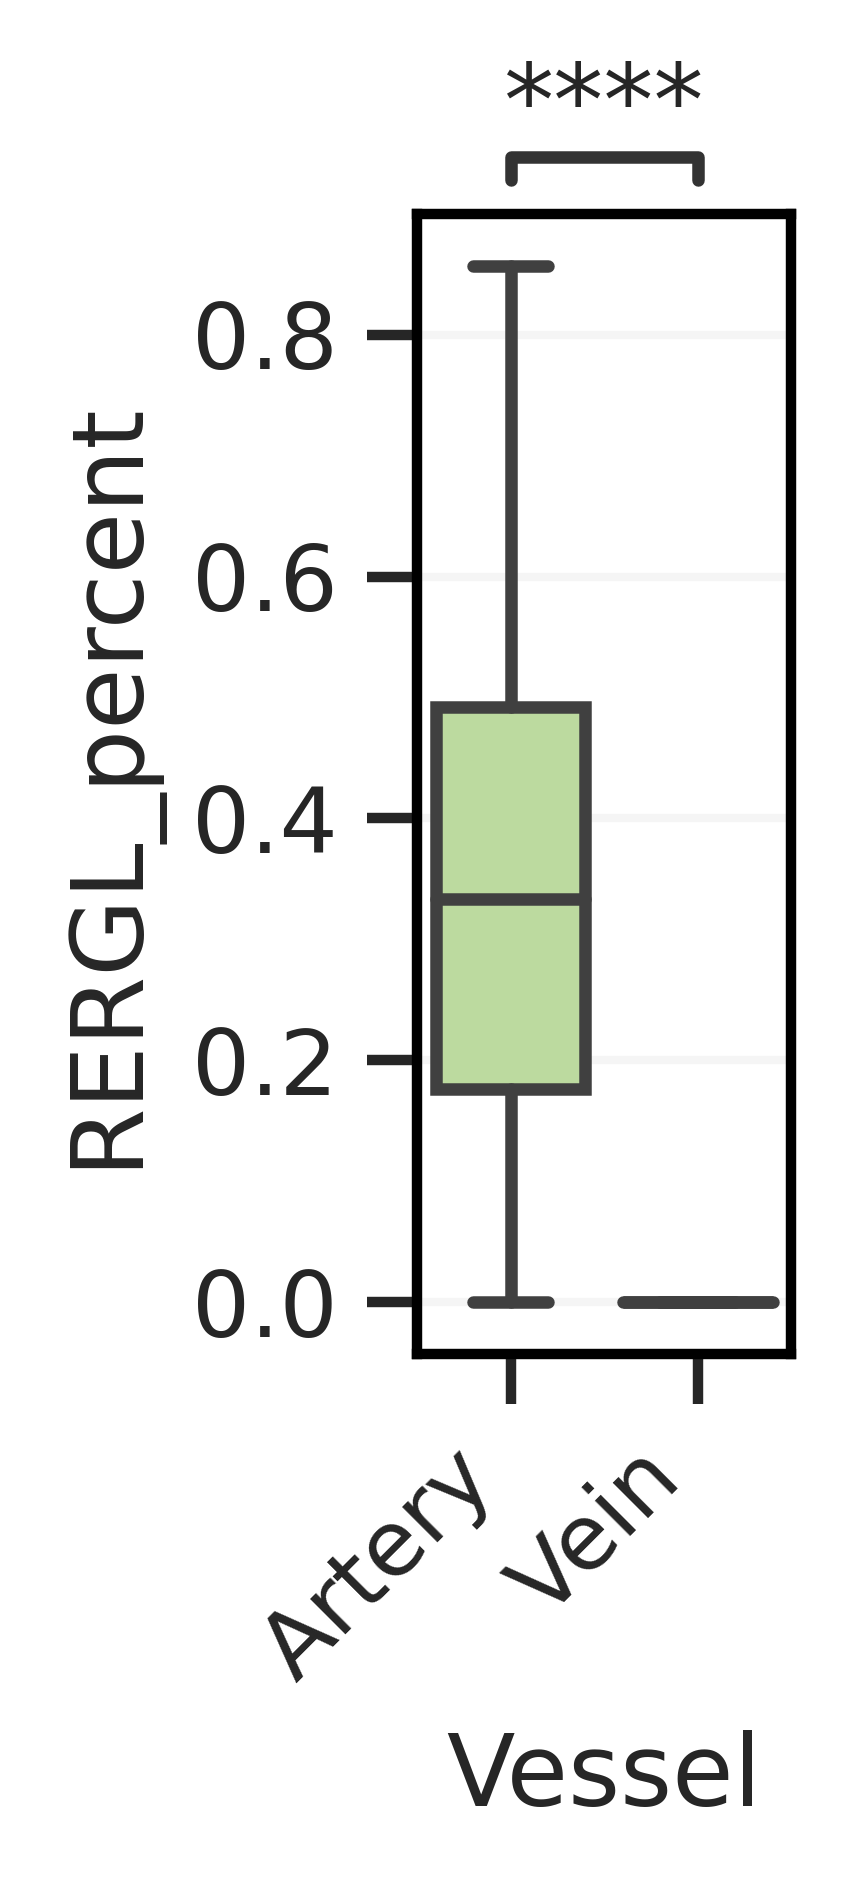

In [15]:
#RERGL percent
ax = sns.boxplot(data = df, x = "Vessel", y = "RERGL_percent", palette = 'YlGn', order = ['Artery','Vein'])
annotator = Annotator(ax, pairs, data = df, x = "Vessel", y = "RERGL_percent", order = ['Artery','Vein'])
annotator.configure(test="Mann-Whitney", text_format = 'star', loc = 'outside', comparisons_correction='benjamini-hochberg', text_offset=0)
plt.xticks(rotation=45, horizontalalignment = 'right')

annotator.apply_and_annotate()
plt.savefig('RERGL_percent.pdf', bbox_inches='tight')
plt.show()

In [17]:
df['RERGL_log2_mean'] = df['RERGL_log2_mean'].fillna(0)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Artery vs. Vein: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.903e-08 U_stat=2.940e+03


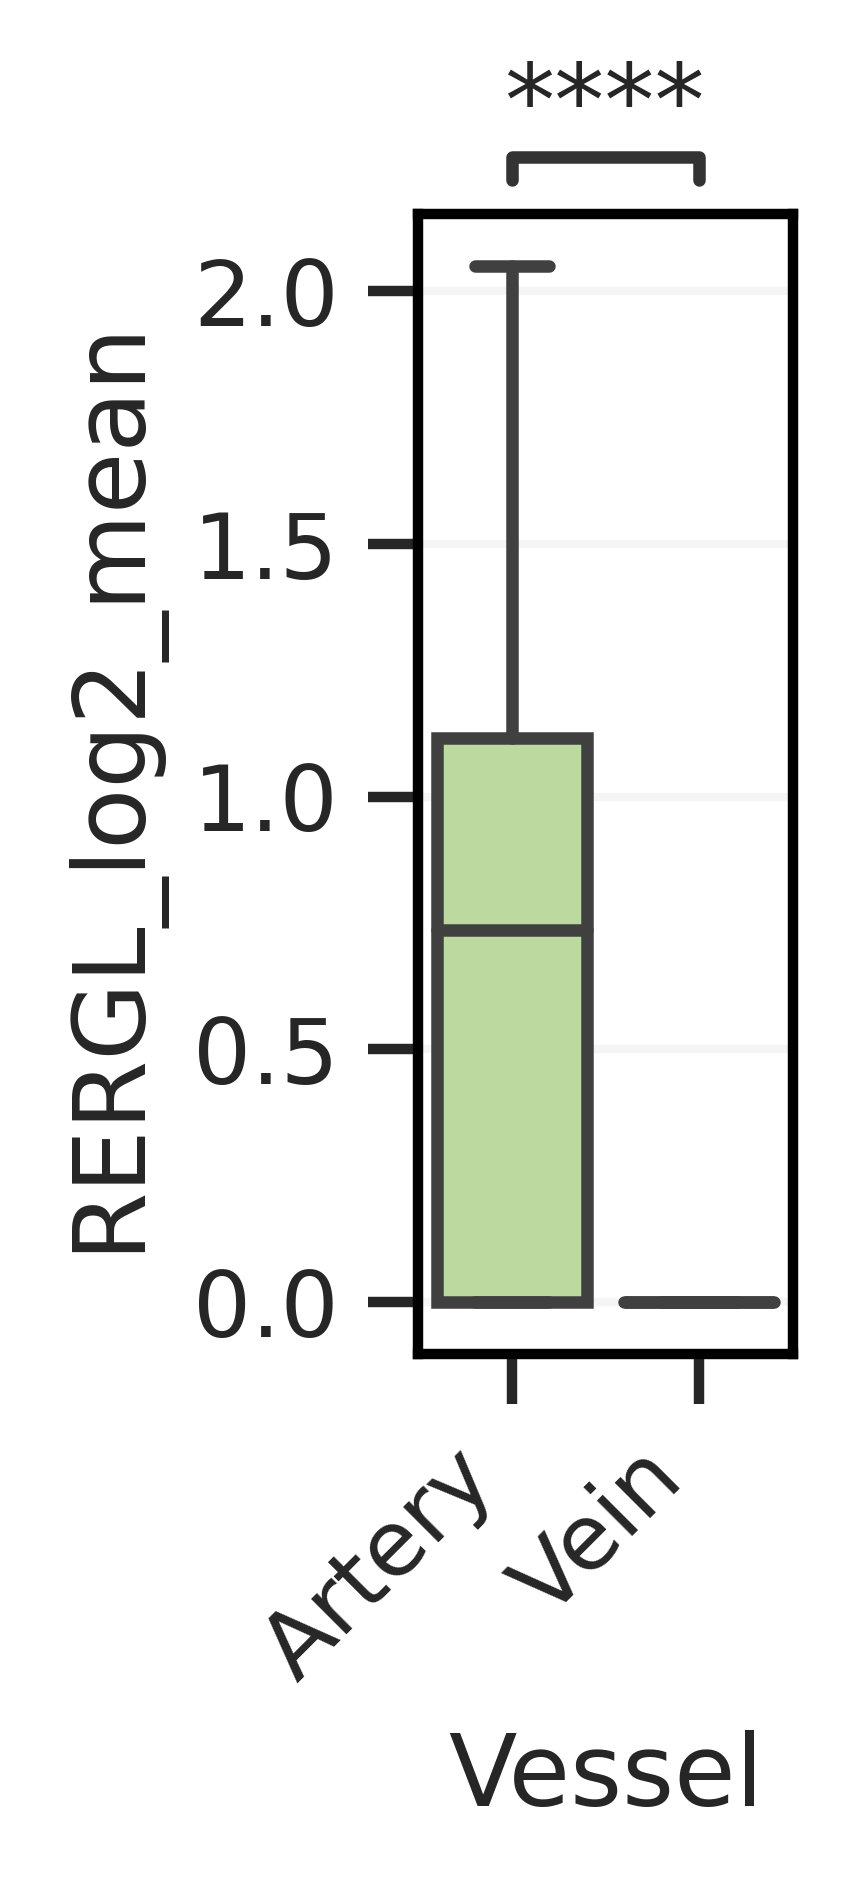

In [18]:
#RERGL percent
ax = sns.boxplot(data = df, x = "Vessel", y = "RERGL_log2_mean", palette = 'YlGn', order = ['Artery','Vein'])
annotator = Annotator(ax, pairs, data = df, x = "Vessel", y = "RERGL_log2_mean", order = ['Artery','Vein'])
annotator.configure(test="Mann-Whitney", text_format = 'star', loc = 'outside', comparisons_correction='benjamini-hochberg', text_offset=0)
plt.xticks(rotation=45, horizontalalignment = 'right')

annotator.apply_and_annotate()
plt.savefig('RERGL_percent.pdf', bbox_inches='tight')
plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Artery vs. Vein: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.641e-10 U_stat=2.890e+02


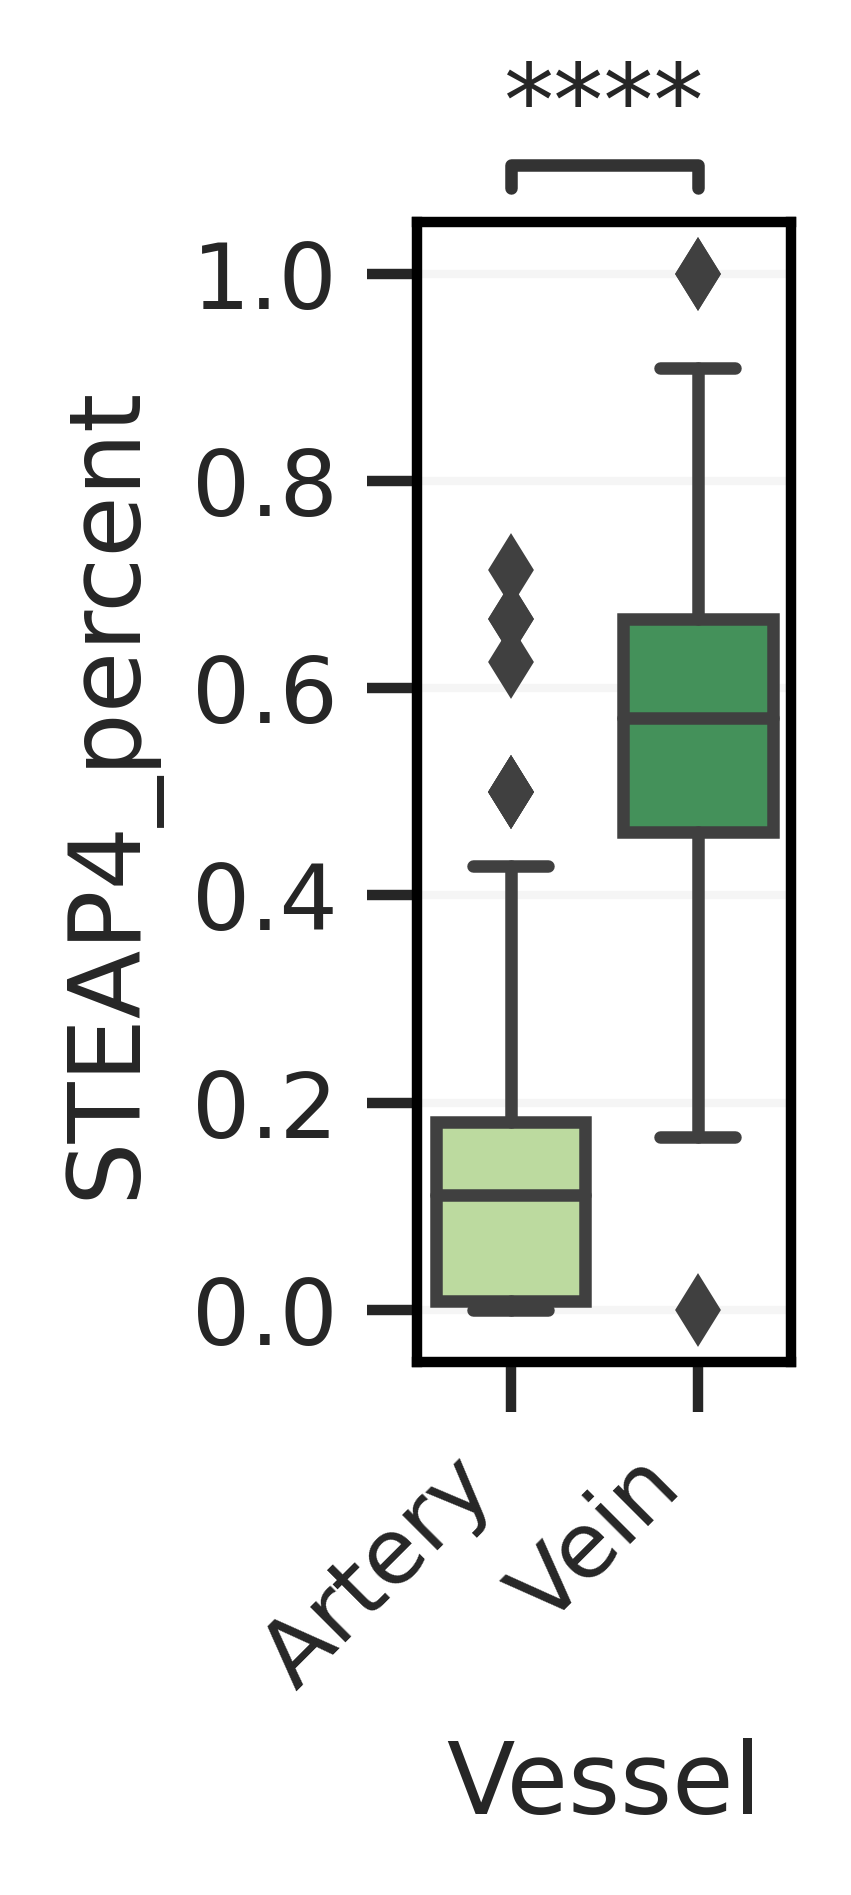

In [19]:
ax = sns.boxplot(data = df, x = "Vessel", y = "STEAP4_percent", palette = 'YlGn', order = ['Artery','Vein'])
annotator = Annotator(ax, pairs, data = df, x = "Vessel", y = "STEAP4_percent", order = ['Artery','Vein'])
annotator.configure(test="Mann-Whitney", loc = 'outside', comparisons_correction='benjamini-hochberg')
plt.xticks(rotation=45, horizontalalignment = 'right')

annotator.apply_and_annotate()
plt.savefig('STEAP4_percent.pdf', bbox_inches='tight')
plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Artery vs. Vein: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:7.232e-09 U_stat=2.690e+02


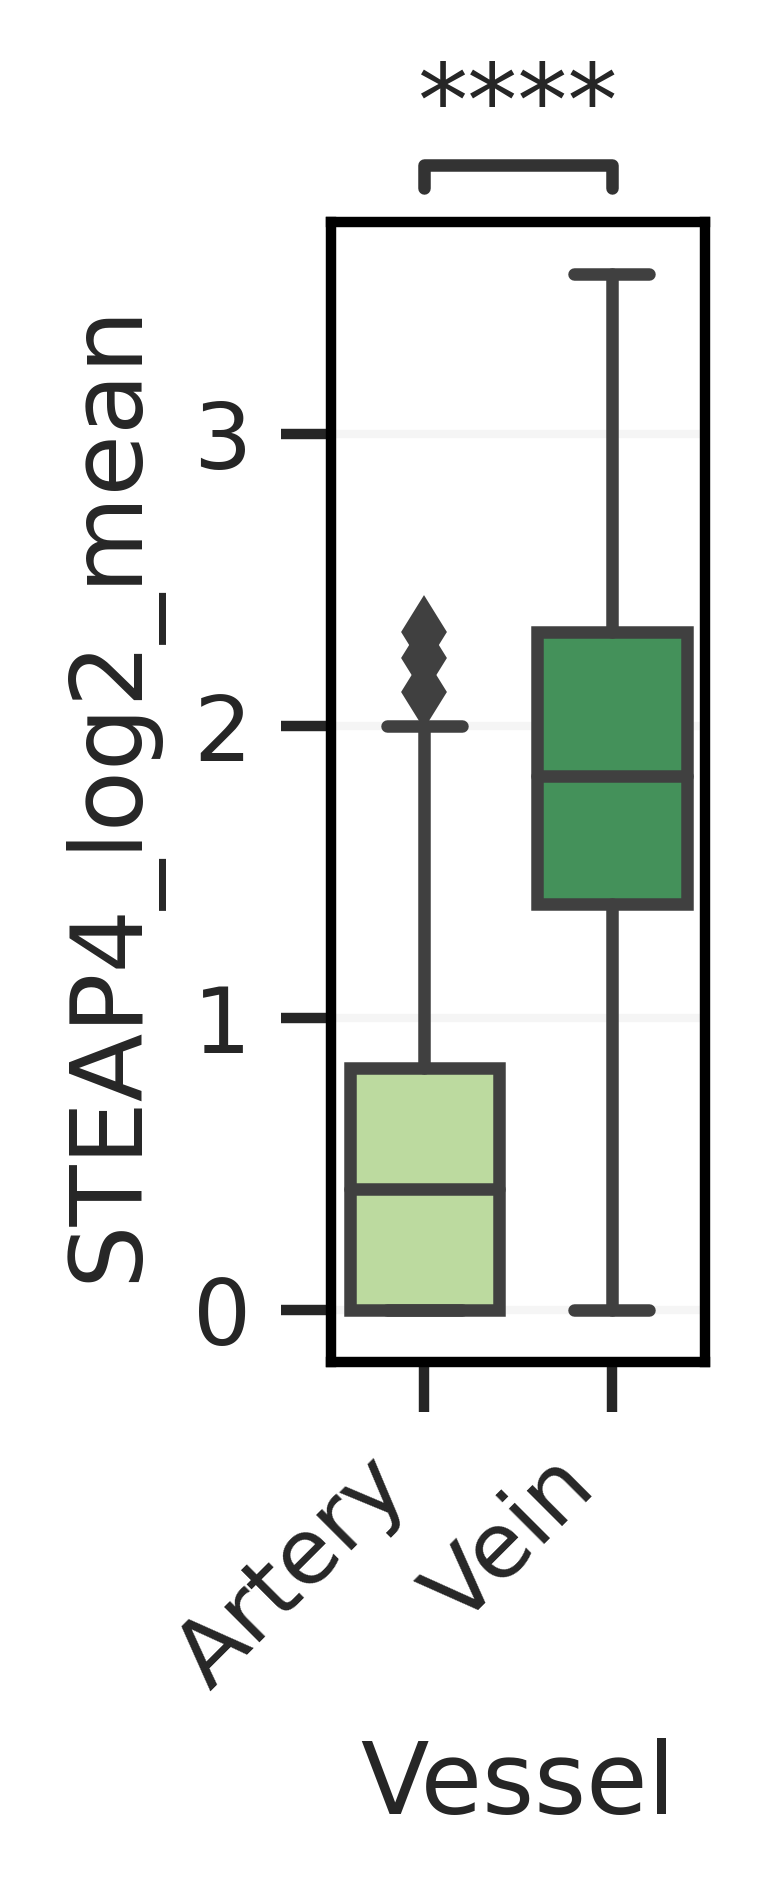

In [20]:
ax = sns.boxplot(data = df, x = "Vessel", y = "STEAP4_log2_mean", palette = 'YlGn', order = ['Artery','Vein'])
annotator = Annotator(ax, pairs, data = df, x = "Vessel", y = "STEAP4_log2_mean", order = ['Artery','Vein'])
annotator.configure(test="Mann-Whitney", loc = 'outside', comparisons_correction='benjamini-hochberg')
plt.xticks(rotation=45, horizontalalignment = 'right')

annotator.apply_and_annotate()
plt.savefig('STEAP4_los2_mean_expression.pdf', bbox_inches='tight')
plt.show()